In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.\
mostrecent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
mostrecent

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latestyear = dt.date(2017,8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > latestyear).\
order_by(Measurement.date).all()
precipitation[0]

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precipitation, columns=['date', 'prcp'])
precip_df


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [11]:
# Sort the dataframe by date
# clean_df = precip_df.set_index('date',inplace=True, drop=True)
# clean_df.sort_index(ascending = True)
# clean_df.head()

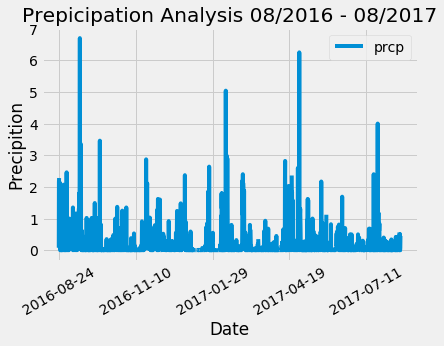

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot('date','prcp')
plt.title('Prepicipation Analysis 08/2016 - 08/2017')
plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Precipition')
plt.savefig("Precipitation.png")

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe() 

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).count() 
print(f'There are {station_count} stations.')

There are 9 stations.


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activity = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

df = pd.DataFrame(activity, columns=['station', 'activity count'])
df

,station,activity count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = 'USC00519281'
query = session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == active_station).all()
print(f'min:{query[0][0]}, max:{query[0][1]}, avg:{query[0][2]}')

min:54.0, max:85.0, avg:71.66378066378067


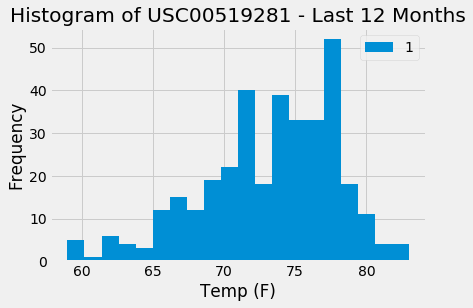

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

hist_data = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-24").\
                        filter(Measurement.date <= "2017-08-23").\
                        filter(Measurement.station == active_station).all()

hist_df = pd.DataFrame(hist_data)
hist_df.plot.hist(bins=20)
plt.title('Histogram of USC00519281 - Last 12 Months')
plt.xlabel('Temp (F)')
plt.savefig("USC00519281-last12months.png")

# Close session

In [18]:
# Close Session
session.close()